<a href="https://colab.research.google.com/github/YadhuKrishna2001/ROC_SVM/blob/main/Roc_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

Importing **dataset**

In [ ]:
data=pd.read_csv('/content/Heartt.csv')
data.drop(columns=['ID','Name'],inplace=True)
data

,Age,Gender,Cholesterol,Smoker,Heart Attack
0,45,Male,200,No,0
1,35,Female,180,No,0
2,55,Male,220,Yes,1
3,40,Female,190,No,0
4,50,Male,210,Yes,1
5,30,Female,170,No,0
6,60,Male,230,No,1
7,38,Female,195,No,0
8,48,Male,205,Yes,1
9,42,Female,200,Yes,0


Droping **Duplicate**

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

Encoding

In [ ]:
# Encode categorical data
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoker'] = label_encoder.fit_transform(data['Smoker'])


Independent/Dependent

In [ ]:
# Separate features and target variable
X = data[['Age', 'Cholesterol']]
y = data['Heart Attack']

Training Data

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training model

In [ ]:
# Train SVM classifier
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

Checking Accuracy

In [ ]:
print(f"Accuracy : {(model.score(x_test,y_test))*100}%")

Accuracy : 100.0%


Ploting

In [ ]:
#Plot decision boundary
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['Cholesterol'].min() - 1, X['Cholesterol'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[data["Heart Attack"] == 1]["Age"], data[data["Heart Attack"] == 1]["Cholesterol"], color='b', label='Heart Attack')
plt.scatter(data[data["Heart Attack"] == 0]["Age"], data[data["Heart Attack"] == 0]["Cholesterol"], color='r', label='No Heart Attack')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

NameError: name 'clf' is not defined

# **Hyperparameter Tuning for 3D**

Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)


Fitting and predicting the Accuracy(model)

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(x_test)
print(f"Accuracy : {(svc.score(x_test,y_test))*100} %")

Accuracy : 100.0 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



**Confusion Matrix**
```



Confusion matrix

 [[5 0]
 [0 2]]

True Positives(TP) =  5

True Negatives(TN) =  2

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

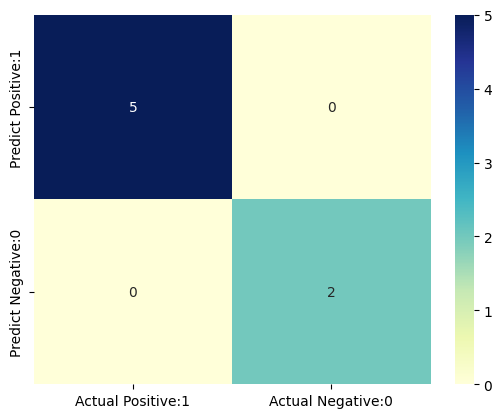

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classsification

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



**Hyper Parameter Tuning Using Grid Search**
(checking the best combination)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':
[0.01,0.02,0.03,0.04,0.05]}]

grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=2)
grid_search.fit( X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

Checking best **Parameter**


In [ ]:
6
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'kernel': 'linear'}


In [ ]:
import numpy as np
from sklearn .metrics import roc_auc_score

#y_true = [1, 1, 0, 0, 1, 0]
#y_pred = [0.95, 0.90, 0.85, 0.81, 0.78, 0.70]
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))


Auc for our sample data is 1.0
